In [1]:
import pandas as pd
import os
import seaborn as sns
import pandas as pd
import seaborn as sns

from grafi import (
    display_error_tables,
    display_winddir_met,
    display_cosine,
    plot_metric_res_2,
    plot_metric_res,
    plot_wind_speed_comparison,
    plot_week_comparison_with_dates,
    plot_wind_direction_comparison_bezigrad,
    plot_wind_speed_error_by_hour_multistation,
    plot_wind_speed_error_by_month_all_stations,
    plot_wind_errors_all_stations,
    plot_wdir_error_by_wspeed_all_stations,
    plot_absolute_wind_speed_error_windrose,
    compare_wind_plots_for_stations,
    plot_wind_speed_error_windrose,
    plot_absolute_wind_direction_error_windrose,
    plot_wind_direction_error_windrose
)
from utils import (
    add_uv,
    finalize_df,
    evaluate_model,
    get_final_uv,
    Station,
    read_ascii,
    calculate_wind_parameters,
    process_wind,
    prepare_observations,
    get_info,
    get_model_stations_data,
    solve_st_for_point,
    get_final_uv_netcdf,
    get_model_stations_data_cdf
)
from postaje import (
    get_stations, get_names
)

In [2]:
base_path = "C:\\Users\\alex\\Desktop\\veter_data"

if not os.path.exists(base_path):
    print(f"{base_path} ne obstaja")

In [3]:
# meteopgt2021.all
file_2021 = os.path.join(base_path, 'meteopgt2021.all')
meteopgt_2021 = prepare_observations(file_2021, 2021)

# meteopgt2023.all
file_2023 = os.path.join(base_path, 'meteopgt2023.all')
meteopgt_2023 = prepare_observations(file_2023, 2023)

In [4]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [5]:
name = "2aladinGRAMM2021.nc"
base_path_44_2021 = os.path.join(base_path, name)
if not os.path.exists(base_path_44_2021):
    print(f"{base_path_44_2021}' ne obstja")
stations = get_stations()
stations = get_model_stations_data_cdf(base_path_44_2021, stations, "44km_2021")
df_2021 = finalize_df(meteopgt_2021, stations)
results_2021 = evaluate_model(stations, df_2021)

name = "aladinGRAMM2023.nc"
base_path_44_2023 = os.path.join(base_path, name)
if not os.path.exists(base_path_44_2023):
    print(f"{base_path_44_2023}' ne obstja")
stations = get_stations()
stations = get_model_stations_data_cdf(base_path_44_2023, stations, "44km_2023")
df_2023 = finalize_df(meteopgt_2023, stations)
results_2023 = evaluate_model(stations, df_2023)

loaded
loaded


In [6]:
names = get_names()

In [7]:
df_both = pd.concat([df_2021, df_2023])
results_both = evaluate_model(stations, df_both)
print(results_both)

               Name      MAE    RMSE    MAPE  Cosine      R2     Bias
0        bezigrad_u   0.8452  1.2085  109.68  0.3613  0.1274   0.0250
1        bezigrad_v   0.8482  1.1939  104.55  0.3613 -0.2069   0.0742
2   bezigrad_WSpeed   0.7812  1.0886   67.29     NaN  0.0906   0.2786
3     bezigrad_WDir  60.7876     NaN     NaN     NaN     NaN  -7.6366
4           borst_u   0.9905  7.5908  129.33  0.2205  0.0067  -0.2205
5           borst_v   0.9893  4.4373  110.47  0.2205 -0.0027  -0.0883
6      borst_WSpeed   0.8330  8.6737   67.10     NaN  0.0048  -0.0839
7        borst_WDir  73.7390     NaN     NaN     NaN     NaN  10.7028
8          let_lj_u   1.1544  1.5247  106.93  0.1826  0.1737  -0.2186
9          let_lj_v   0.8455  1.1816  109.73  0.1826 -0.0668  -0.0744
10    let_lj_WSpeed   0.8953  1.2622   57.46     NaN  0.0456  -0.5500
11      let_lj_WDir  76.3933     NaN     NaN     NaN     NaN  13.8313
12          pasja_u   0.9595  1.1744   82.82  0.5171  0.3240   0.0844
13          pasja_v 

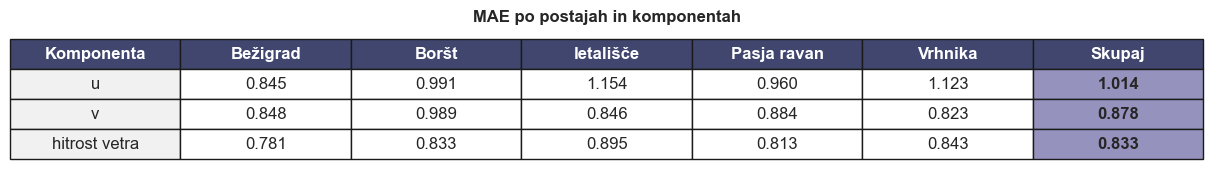

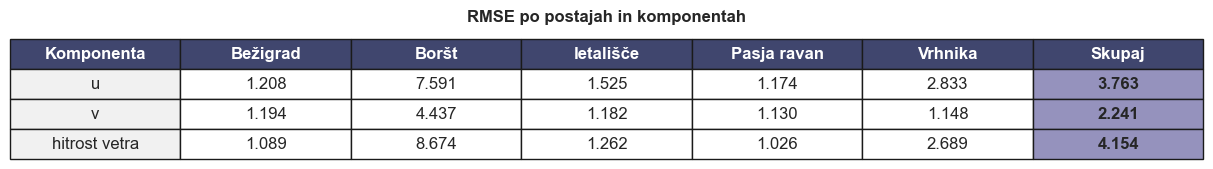

In [8]:
display_error_tables(results_both, stations, n=names)

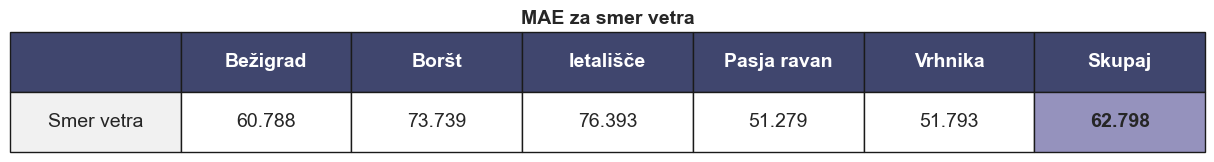

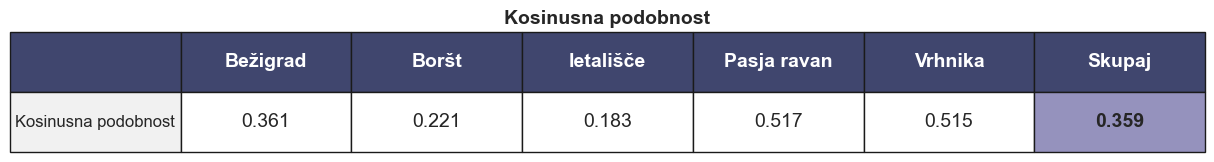

In [9]:
display_winddir_met(results_both, stations, names)
display_cosine(results_both, stations, names)

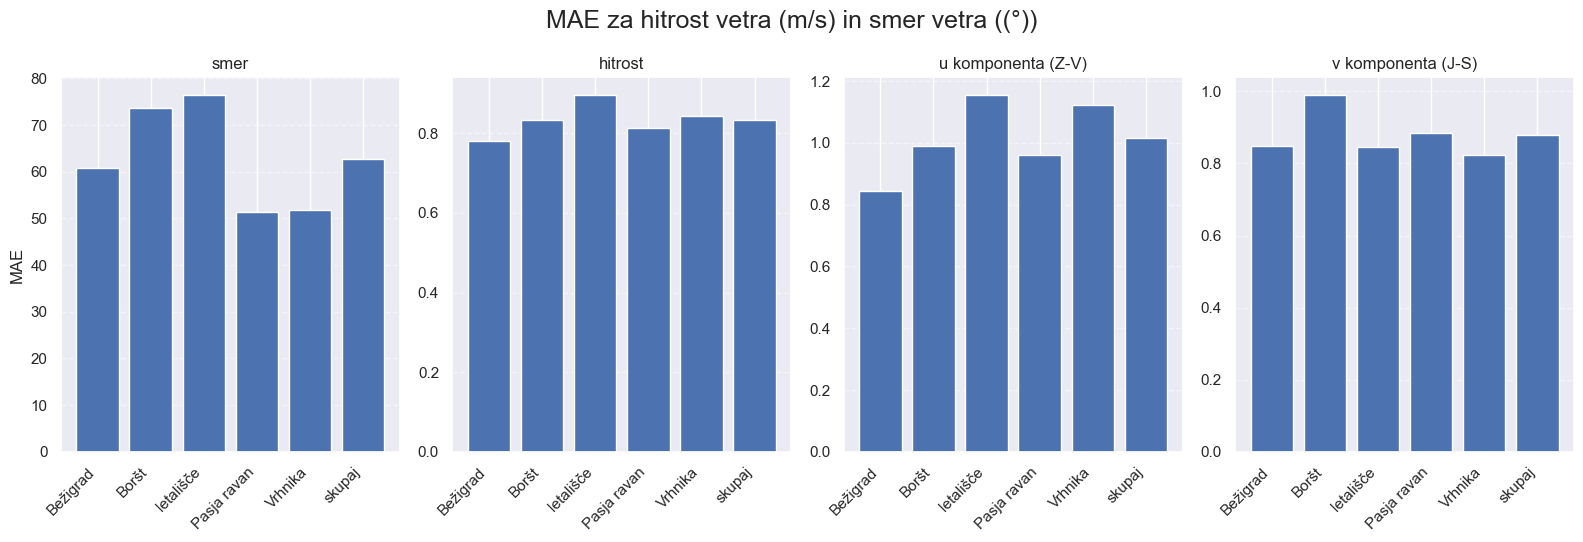

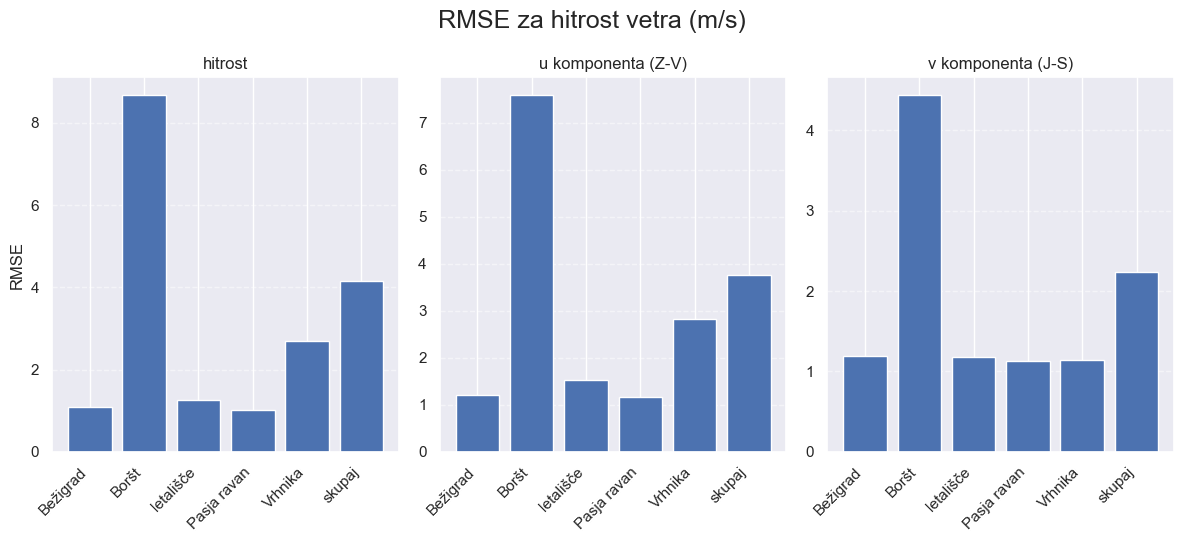

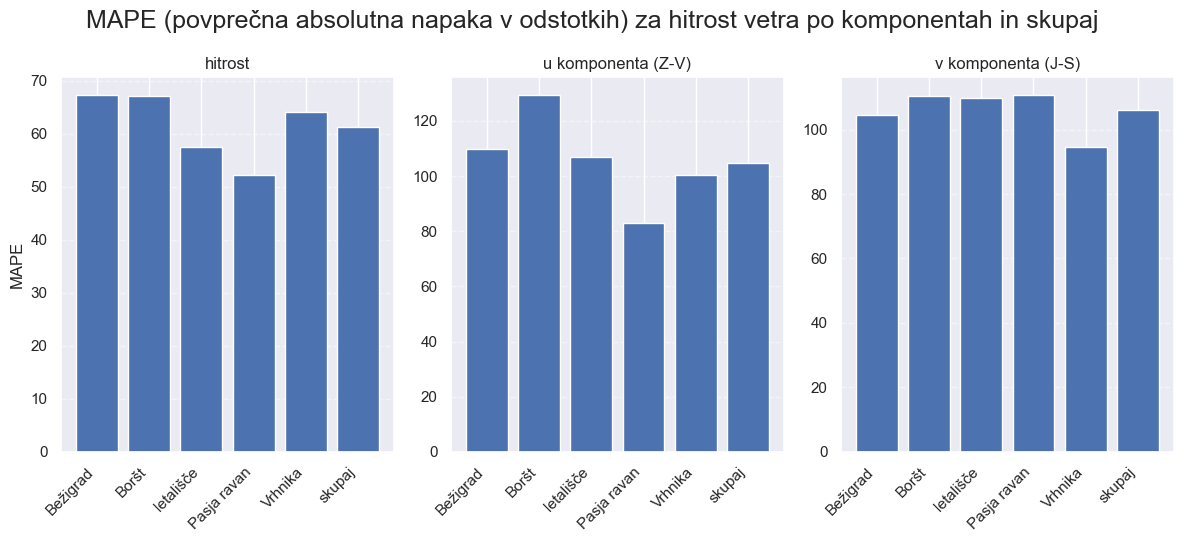

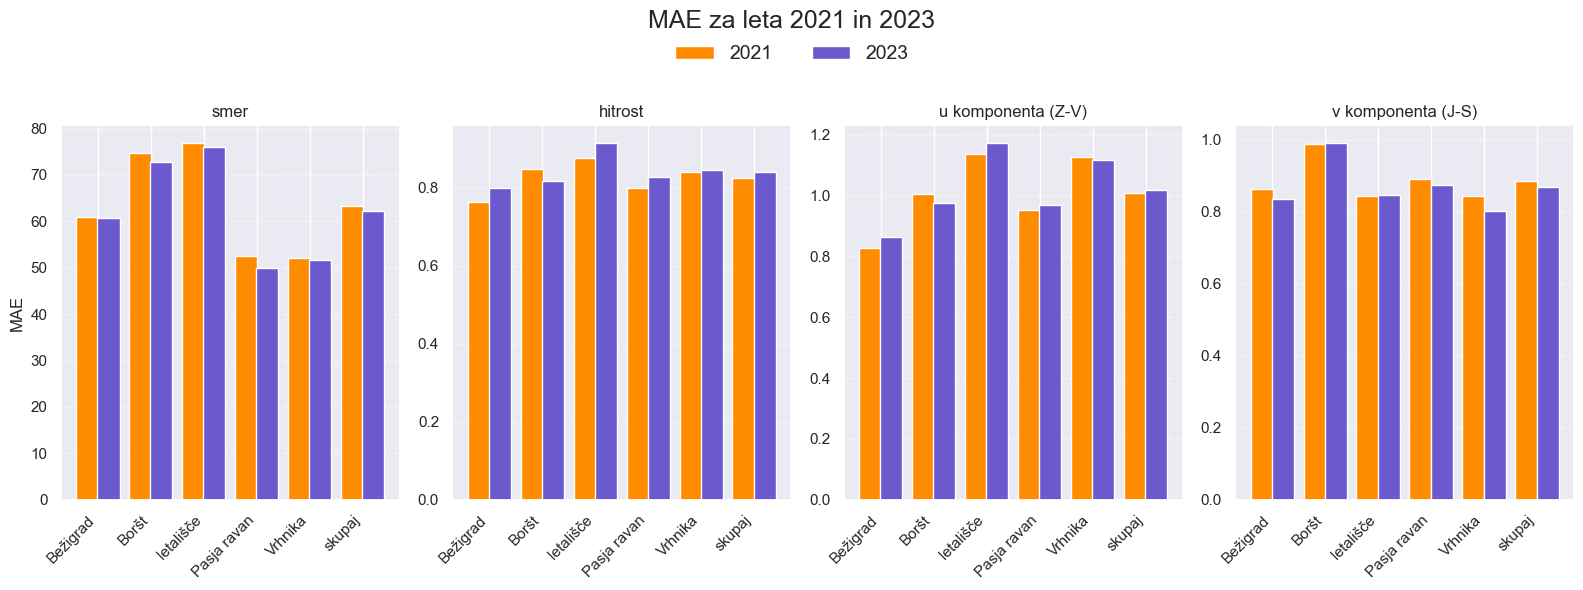

In [10]:
plot_metric_res(
    metric='MAE',
    df1=results_both,
    names=names,
    title='MAE za hitrost vetra (m/s) in smer vetra ((°))'
)

plot_metric_res(
    metric='RMSE',
    df1=results_both,
    names=names,
    title='RMSE za hitrost vetra (m/s)',
    ign=["WDir"]
)

plot_metric_res(
    metric='MAPE',
    df1=results_both,
    names=names,
    title='MAPE (povprečna absolutna napaka v odstotkih) za hitrost vetra po komponentah in skupaj',
    ign=["WDir"]
)

plot_metric_res_2(
    metric='MAE',
    df1=results_2021,
    df2=results_2023,
    names=names,
    title='MAE za leta 2021 in 2023'
)

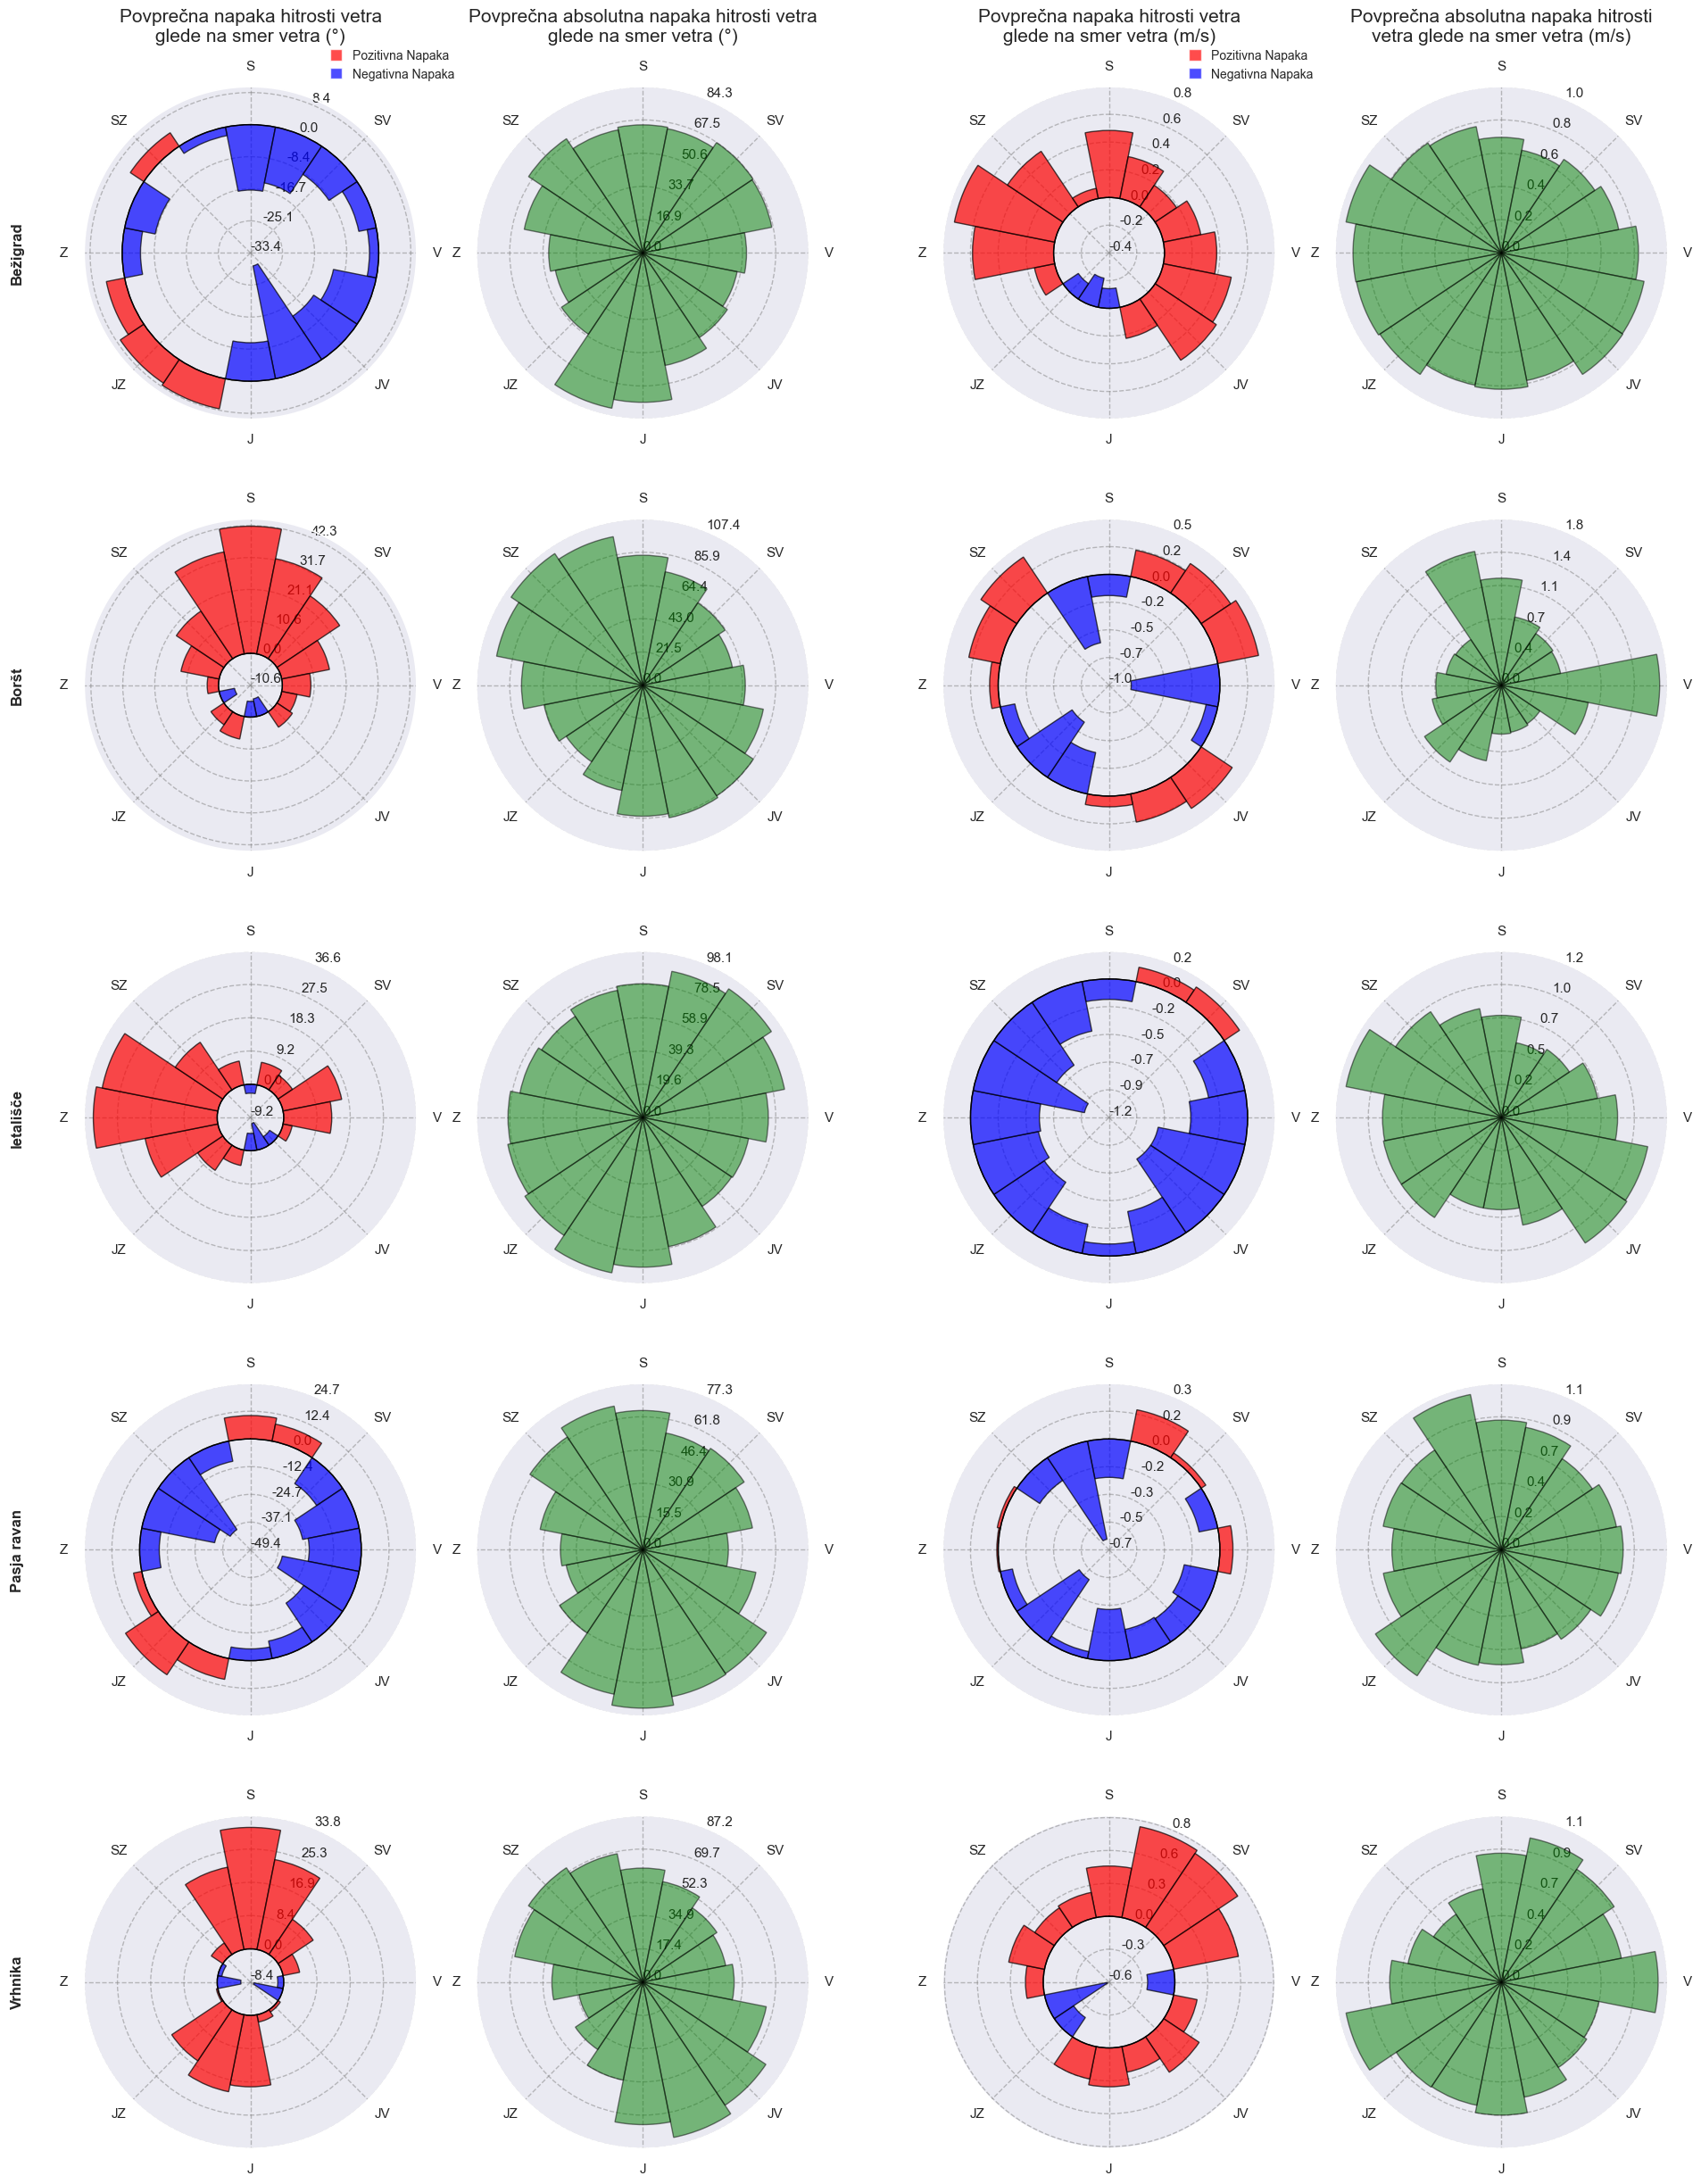

In [11]:
compare_wind_plots_for_stations(df_both, [s for s in stations])

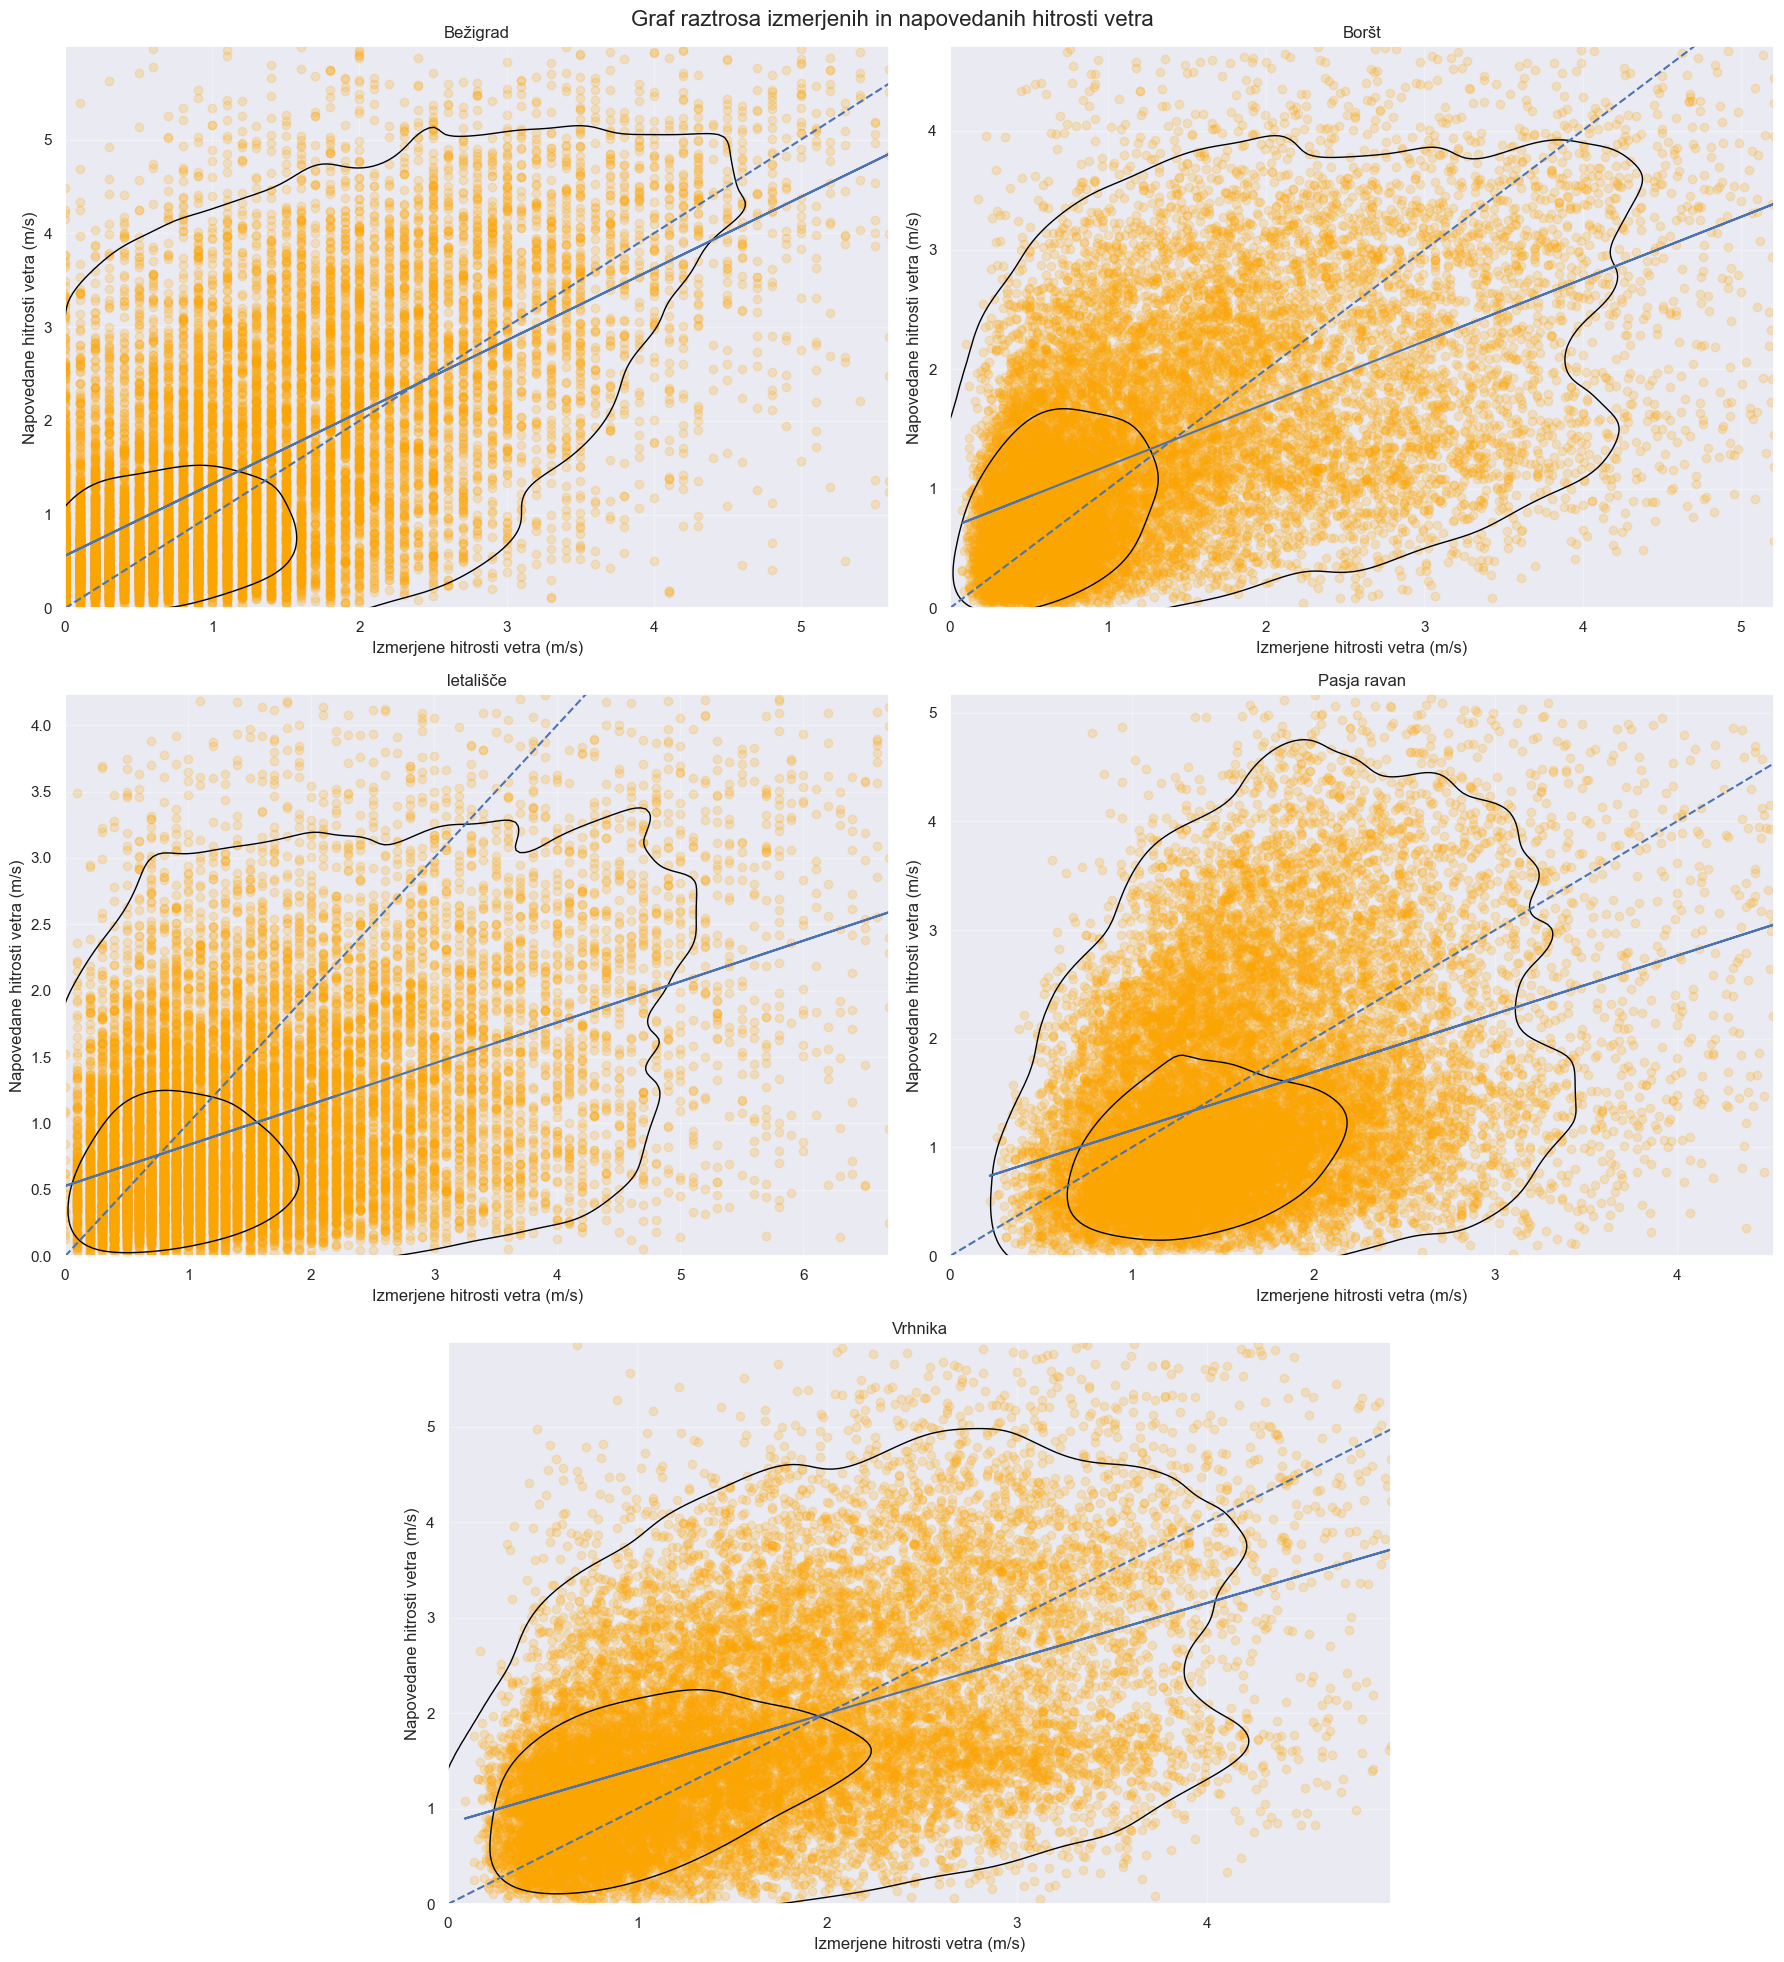

In [12]:
plot_wind_speed_comparison(df_both, stations, names)

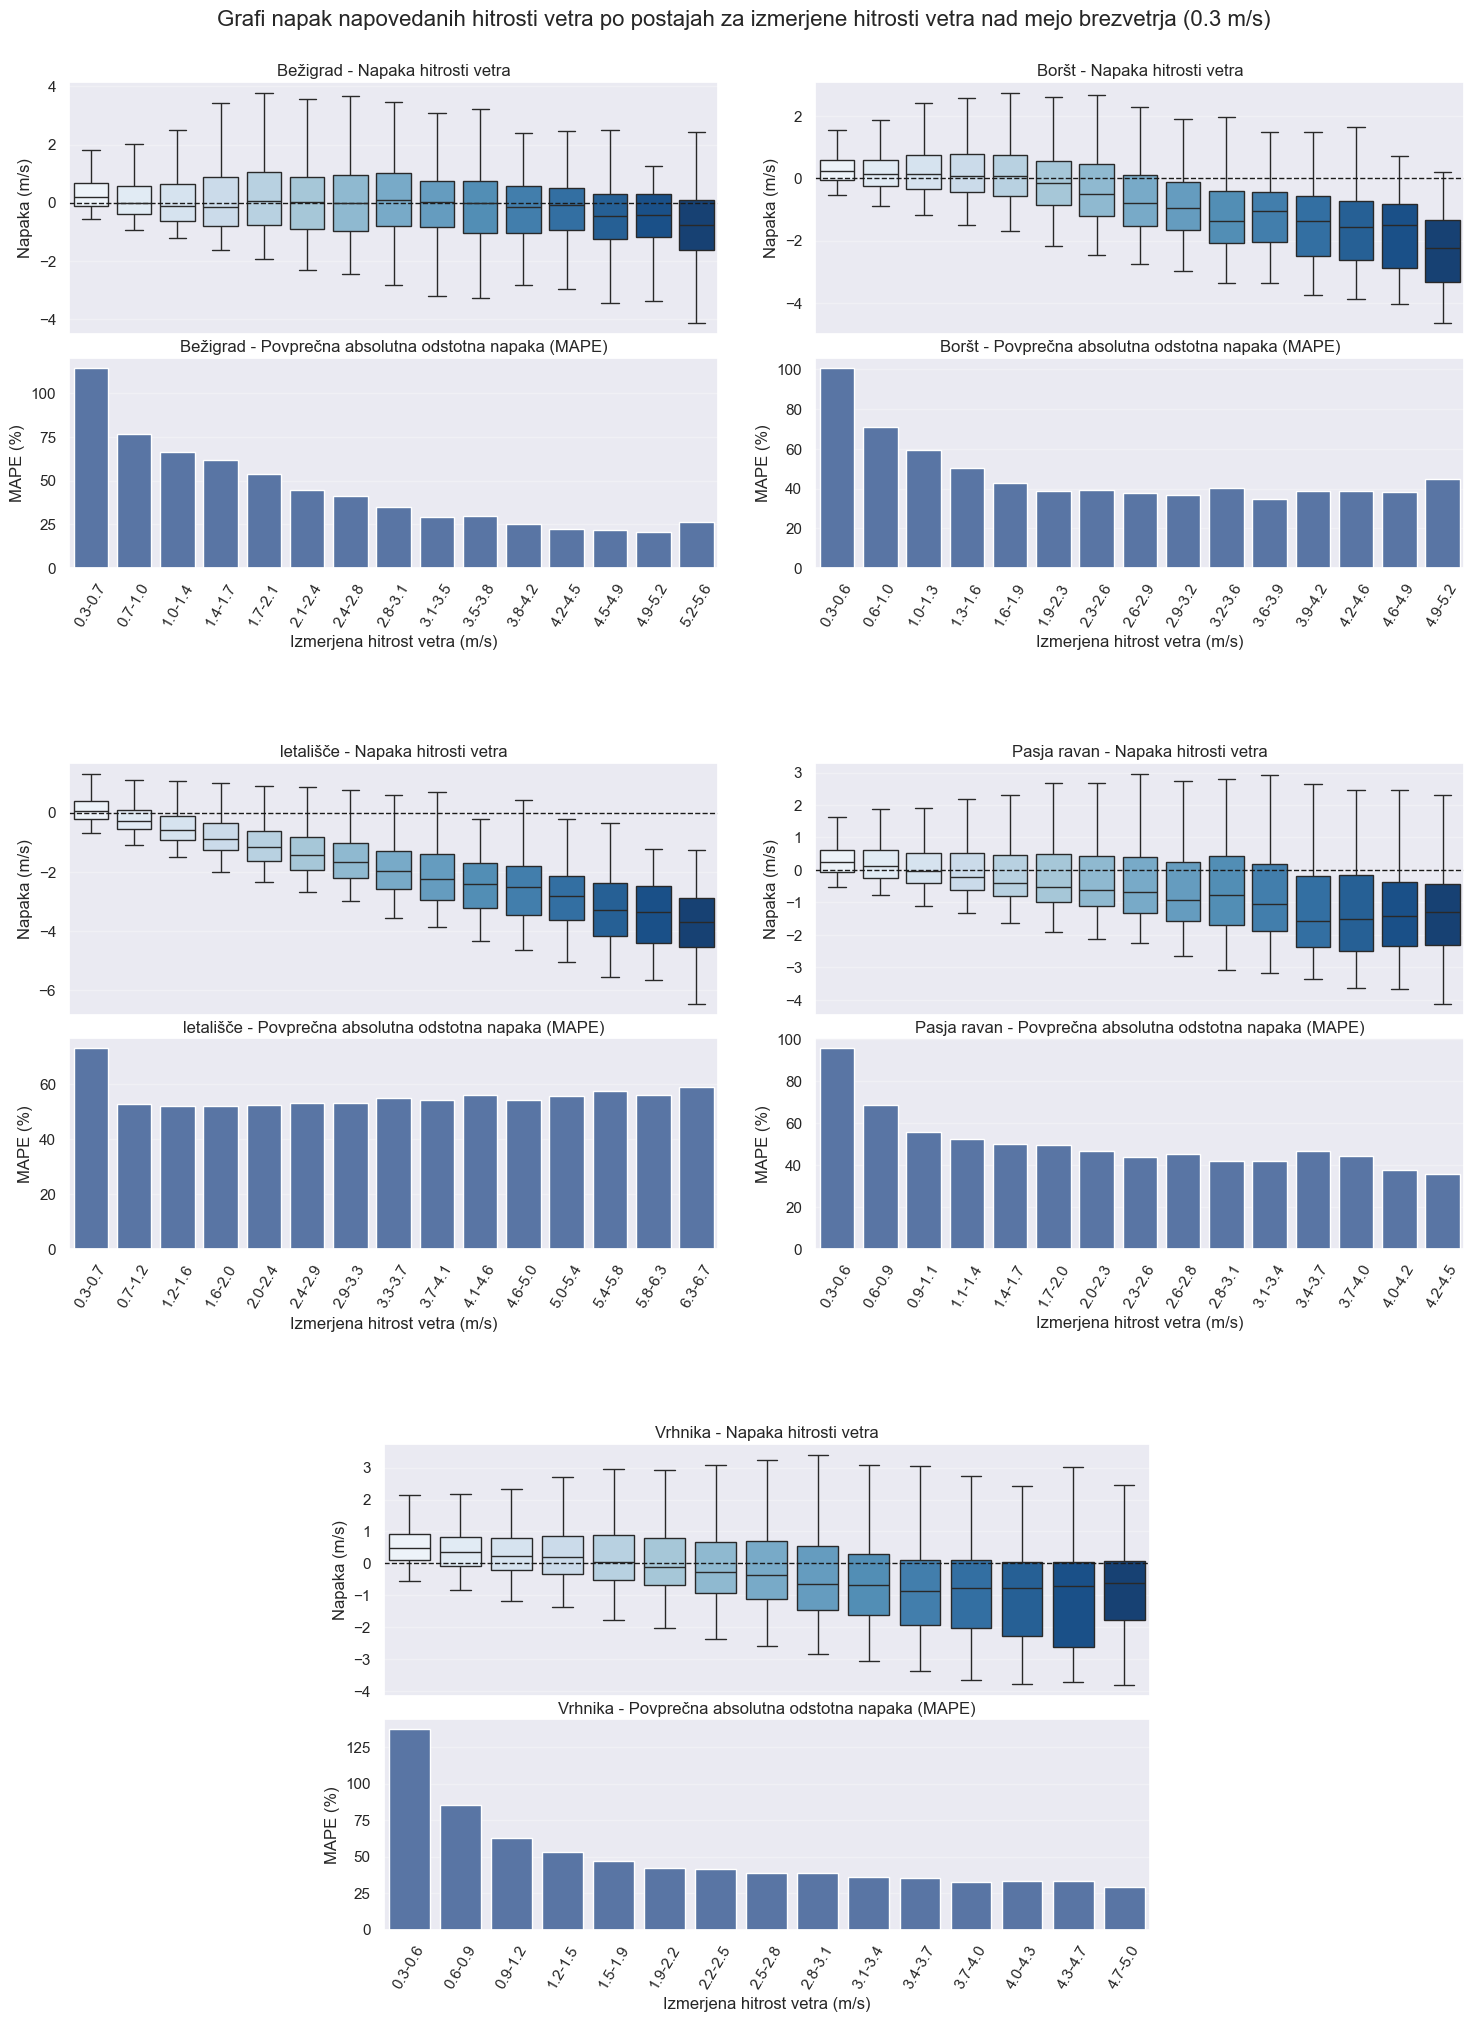

In [13]:
plot_wind_errors_all_stations(df=df_both, stations=[s for s in stations], names=names, num_bins=15, min_wspeed=0.3)

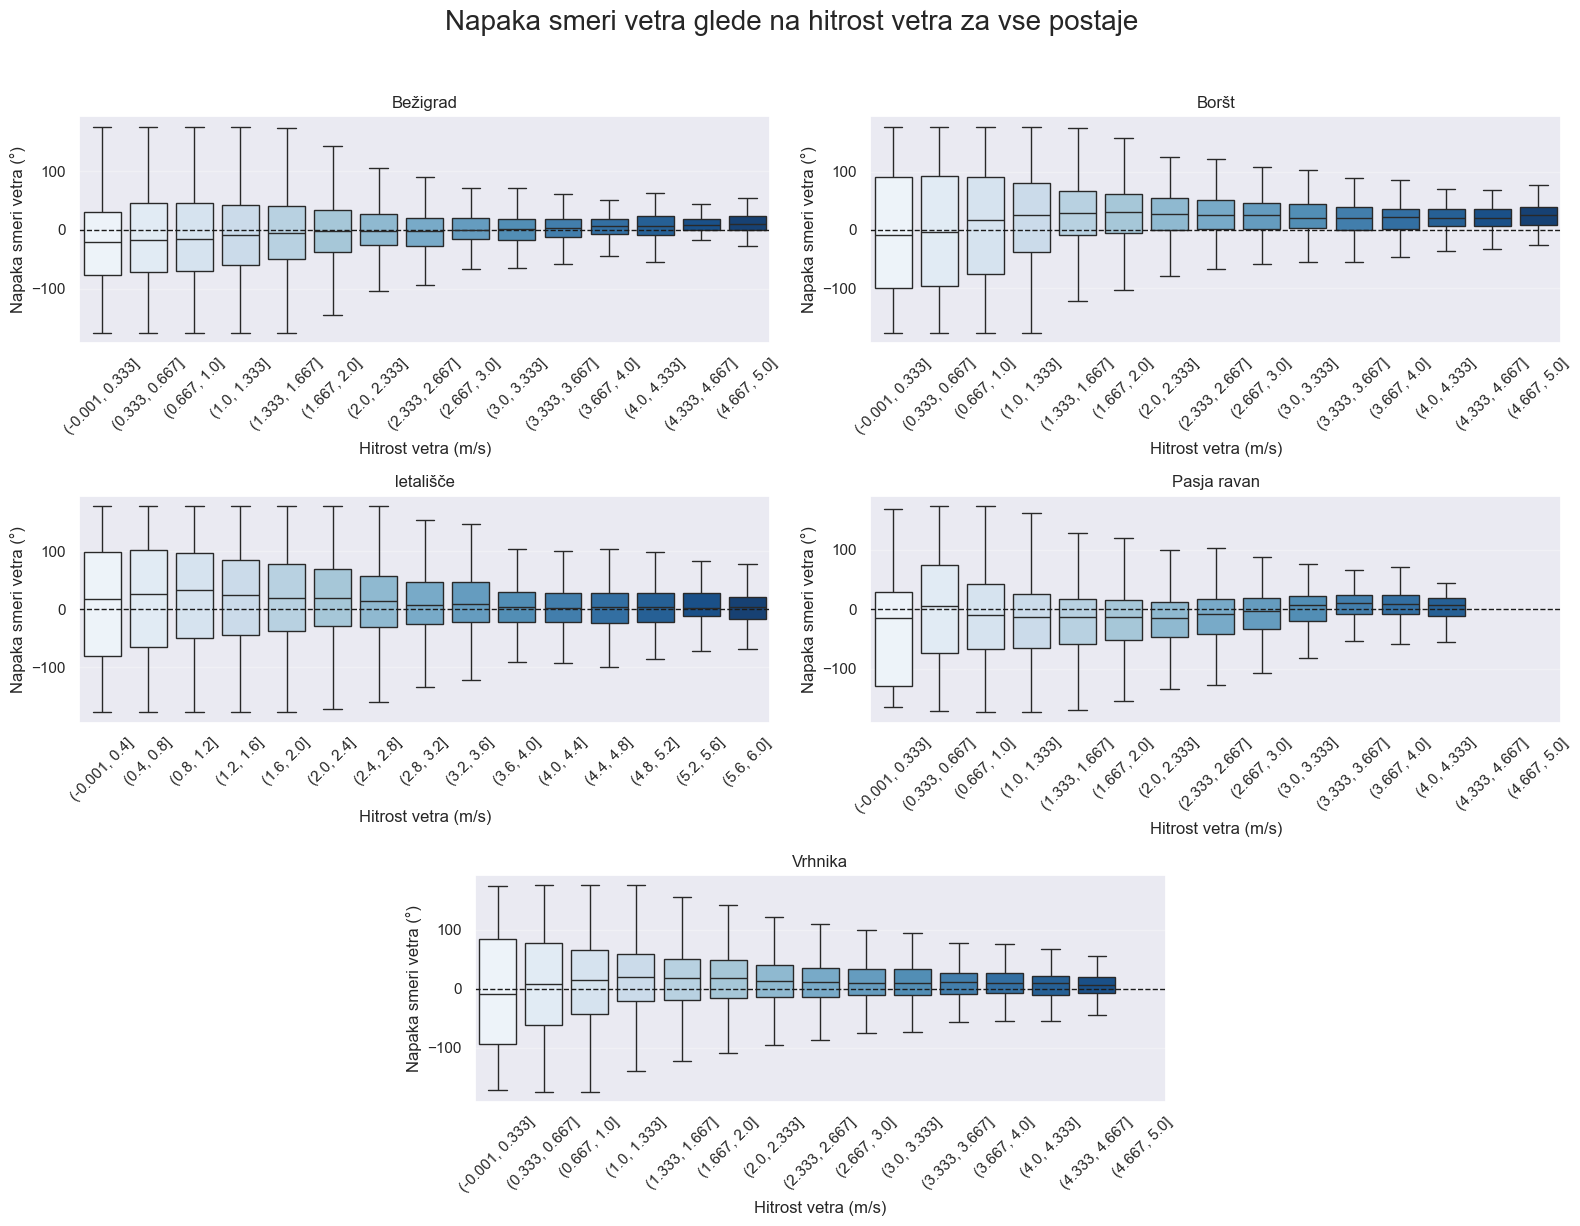

In [14]:
plot_wdir_error_by_wspeed_all_stations(df_both, stations, num_bins=15, names=names)

<Figure size 1400x1500 with 0 Axes>

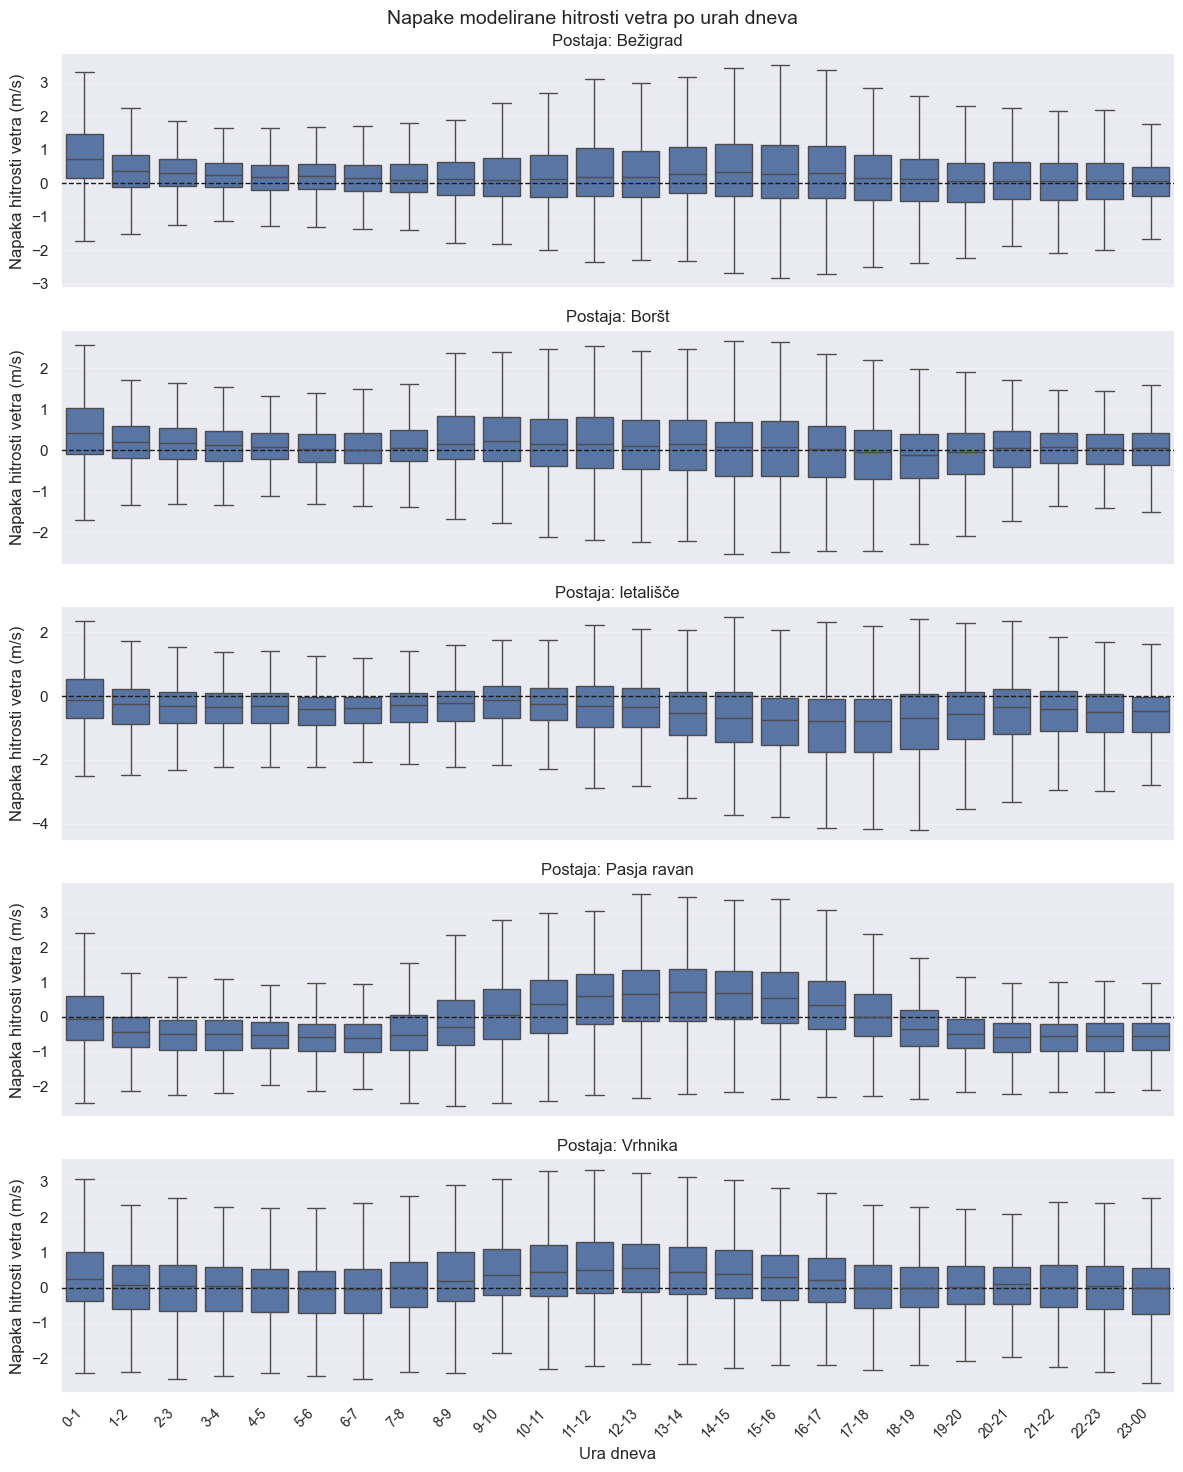

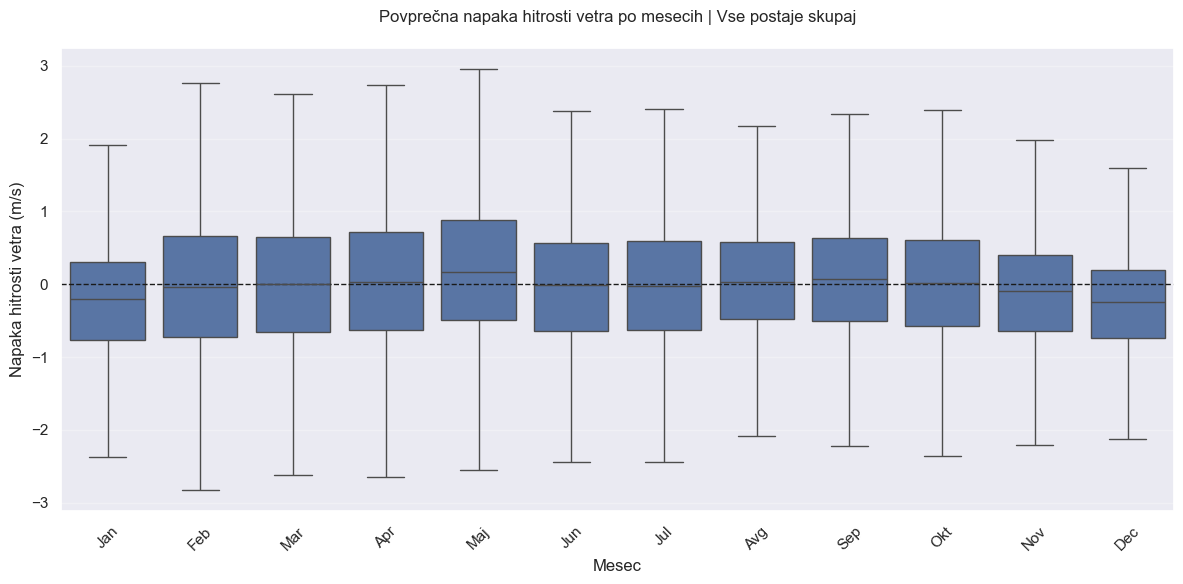

In [15]:
plot_wind_speed_error_by_hour_multistation(df_both, [s for s in stations], names=names, stations_per_plot=5)

plot_wind_speed_error_by_month_all_stations(df_both, [s for s in stations], names)

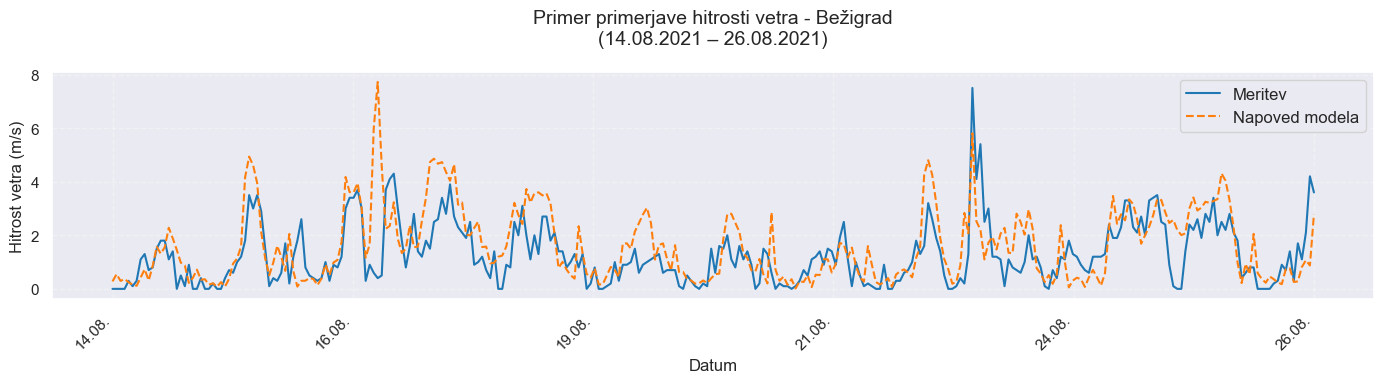

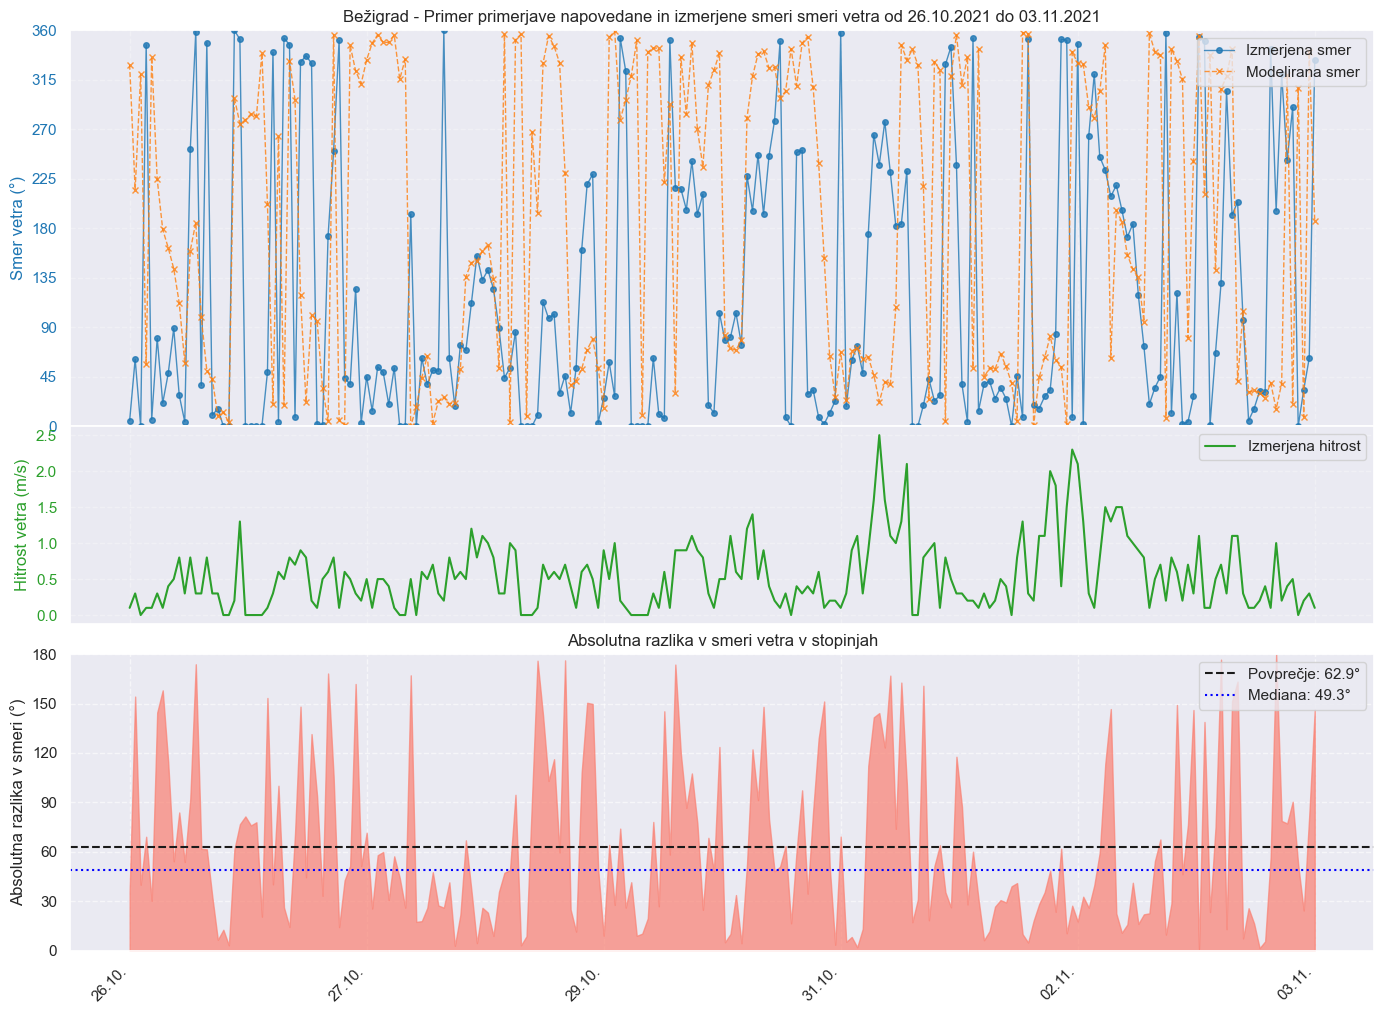

In [16]:
plot_week_comparison_with_dates(df_both)

plot_wind_direction_comparison_bezigrad(df_both, days=9)